In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
path = './AR_warp_zip/test2/'
train_ids = np.arange(1, 26)
test_ids = np.arange(26, 51)
view_ids = np.hstack((np.arange(1, 8), np.arange(14, 21)))

In [4]:
# random projection matrix
D = 165*120 # original dimension
d = 500 # new dimension

ProjectionMatrix = np.random.randn(D, d)

In [5]:
def build_list_fn(pre, img_ids, view_ids):
    """
    INPUT:
        pre = 'M-' or 'W-'
        img_ids: indexes of images
        view_ids: indexes of views
    OUTPUT:
        a list of filenames 
    """

    list_fn = []
    for img_id in img_ids:
        for v_id in view_ids:
            fn = path + pre + str(img_id).zfill(3) + '-' + str(v_id).zfill(2) + '.bmp'
            list_fn.append(fn)
    return list_fn
# build_list_fn('M-', train_ids, view_ids)

In [7]:
def rgb2gray(rgb):
    # Y' = 0.299 R + 0.587 G + 0.144 B
    return rgb[:, :, 0]*0.299 + rgb[:, :, 1]*0.587 + rgb[:, :, 2]*0.144

# feature extraction
def vectorize_img(filename):
    # load image
    rgb = imread(filename)
    # convert to gray scale
    gray = rgb2gray(rgb)
    # vectorization each row is a data point
    im_vec = gray.reshape(1, D)
    return im_vec

def build_data_matrix(img_ids, view_ids):
    total_imgs = img_ids.shape[0]*view_ids.shape[0]*2
    X_full = np.zeros((total_imgs, D))
    y = np.hstack((np.zeros((total_imgs//2,)), np.ones((total_imgs//2, )))) # Nửa đầu là nam (0), Nửa sau là nữ (1)

    list_fn_m = build_list_fn('M-', img_ids, view_ids)
    list_fn_w = build_list_fn('W-', img_ids, view_ids)
    list_fn = list_fn_m + list_fn_w
    
    for i in range(len(list_fn)):
        X_full[i, :] = vectorize_img(list_fn[i])
        
    X = X_full @ ProjectionMatrix
    return X, y

X_train_full, y_train = build_data_matrix(train_ids, view_ids)
x_mean = X_train_full.mean(axis = 0)
x_var  = X_train_full.var(axis = 0)

def feature_extraction(X):
    return (X - x_mean)/x_var     

X_train = feature_extraction(X_train_full)
X_train_full = None ## free this variable 

X_test_full, y_test = build_data_matrix(test_ids, view_ids)
X_test = feature_extraction(X_test_full)
X_test_full = None 

In [92]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 90.86 %


c:\users\nhay103\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
def feature_extraction_fn(fn):
    """
    extract feature from filename
    """
    # vectorize
    im = vectorize_img(fn)
    # project
    im1 = np.dot(im, ProjectionMatrix)
    # standardization 
    return feature_extraction(im1)

fn1 = path + 'M-036-18.bmp'
fn2 = path + 'W-045-01.bmp'
fn3 = path + 'M-048-01.bmp'
fn4 = path + 'W-027-02.bmp'

x1 = feature_extraction_fn(fn1)
p1 = logreg.predict_proba(x1)
print(p1)

x2 = feature_extraction_fn(fn2)
p2 = logreg.predict_proba(x2)
print(p2)

x3 = feature_extraction_fn(fn3)
p3 = logreg.predict_proba(x3)
print(p3)

x4 = feature_extraction_fn(fn4)
p4 = logreg.predict_proba(x4)
print(p4)

[[0.78095099 0.21904901]]
[[0.01962214 0.98037786]]
[[0.35198839 0.64801161]]
[[0.83187634 0.16812366]]


[[0.78095099 0.21904901]]


<Figure size 432x288 with 0 Axes>

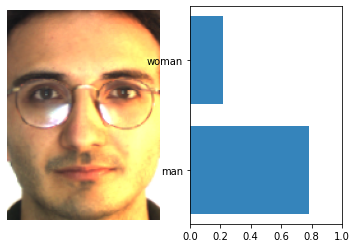

[[0.01962214 0.98037786]]


<Figure size 432x288 with 0 Axes>

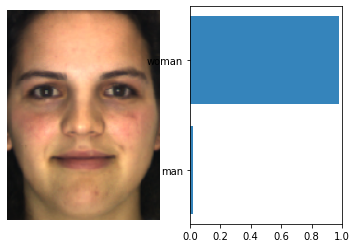

[[0.35198839 0.64801161]]


<Figure size 432x288 with 0 Axes>

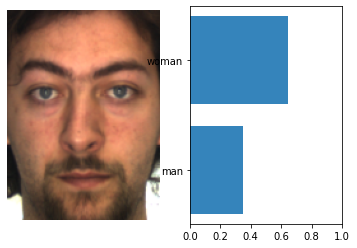

[[0.83187634 0.16812366]]


<Figure size 432x288 with 0 Axes>

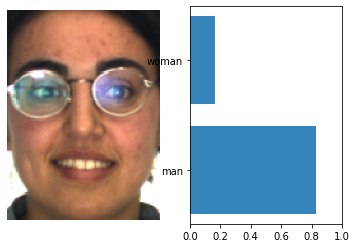

In [94]:
def display_result(fn):
    x1 = feature_extraction_fn(fn)
    p1 = logreg.predict_proba(x1)
    print(logreg.predict_proba(x1))
    rgb = imread(fn)
    
    
    fig = plt.figure()
#     gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
#     plt.subplot(1, 2, 1)
    plt.figure(facecolor="white")
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(rgb)
#     plt.axis('off')
#     plt.show()
    plt.subplot(122)
    plt.barh([0, 1], p1[0], align='center', alpha=0.9)
    plt.yticks([0, 1], ('man', 'woman'))
    plt.xlim([0,1])
    plt.show()
    
    
   
    # load an img 
fn1 = path + 'M-036-18.bmp'
fn2 = path + 'W-045-01.bmp'
fn3 = path + 'M-048-01.bmp'
fn4 = path + 'W-027-02.bmp'
display_result(fn1)
display_result(fn2)
display_result(fn3)
display_result(fn4)